<a href="https://colab.research.google.com/github/ciolh007/machine-learning/blob/master/svm_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from functools import partial

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import math
import random

In [0]:
def createDataSet( features, evalFunc, N, err ):
  nFeatures = len( features )
  X = np.zeros( (N, nFeatures ) )
  Y = np.zeros( N )
  for i in range(N):
    for j in range( nFeatures ):
      min, max = features[j]
      val = random.random() * (max - min ) + min
      X[i][j] = val
    Y[i] = evalFunc( X[i], err )
  return X,Y

In [0]:
def problem1( instance, errPercentage = 0.0 ):
  line = np.array( [ 1 - 0, 1.3 - 0.5 ] )
  lineP = np.array( [ - line[1], line[0] ] )
  d = instance.dot( lineP )
  #print(d)
  if ( random.random() < errPercentage ):
    d = -d
  return d > 0.0

In [0]:
def quadraticProblem( a, b, c, instance, errPercentage):
  xi,yi = instance
  y = a * xi ** 2 + b * xi + c
  if (yi - y ) > 0:
    res = True
  else:
    res = False
  if ( random.random() < errPercentage ):
    res = not res
  return res

In [0]:
def clusterProblem( clusters, instance, errPercentage ):
  inst = np.array( instance )
  

In [0]:
quadratic = partial( quadraticProblem, 1, 0, 0 )
X,Y = createDataSet( [ [-1, 1],  [ 0, 1] ], quadratic, 1000, 0.0 )
print( X[0:10],Y[0:10] )

[[ 0.93386343  0.07874714]
 [ 0.37818217  0.12807965]
 [ 0.70410971  0.45101711]
 [ 0.8547749   0.77178424]
 [-0.05262753  0.19123179]
 [ 0.82278272  0.03245202]
 [-0.85753065  0.74102048]
 [ 0.99450039  0.85986314]
 [-0.64457222  0.82294334]
 [-0.8504921   0.60567973]] [0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [0]:
clf = SVC( gamma=0.01, C=1000, kernel='linear' )

In [0]:
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
print( 'Validation Error',  sum( ( clf.predict(X_test) - y_test ) ** 2 ) / len(X_test), 'Training Error', sum( ( clf.predict(X_train) - y_train ) ** 2 ) / len(X_train) )

Validation Error 0.23 Training Error 0.2775


In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [0]:
def plotSVM( ax, clf, X_train, y_train, X_test, y_test ):
  X = np.vstack( ( X_train, X_test ) )
  X0, X1 = X[:,0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
  ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=100, edgecolors='y')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())


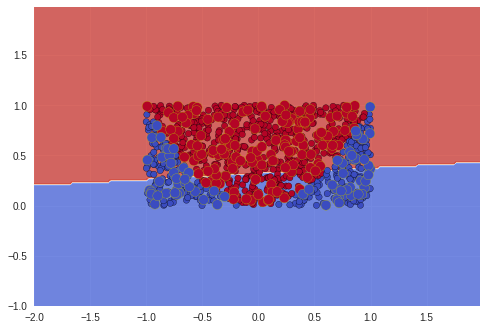

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plotSVM( ax, clf, X_train, y_train, X_test, y_test )
    

In [0]:
clf = SVC( gamma=0.001, C=1.0e20, kernel='poly', degree = 2 )

In [0]:
clf.fit(X_train, y_train)

In [0]:
print( 'Validation Error',  sum( ( clf.predict(X_test) - y_test ) ** 2 ) / len(X_test), 'Training Error', sum( ( clf.predict(X_train) - y_train) ** 2 ) / len(X_train) )

Validation Error 0.05 Training Error 0.05


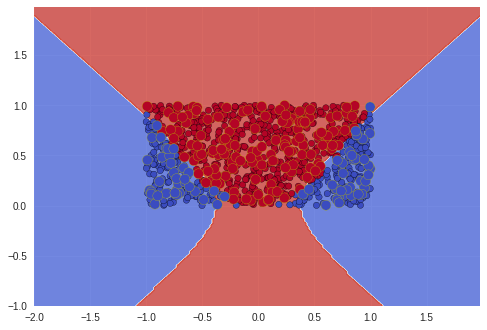

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plotSVM( ax, clf, X_train, y_train, X_test, y_test )
